In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import seaborn as sns
from collections import Counter

In [4]:
ecoli_5S= pd.read_excel('../../../../results/reactivities_and_base_pairs_cleaned.xlsx', sheet_name='ecoli_5S_DMS')
ecoli_16S= pd.read_excel('../../../../results/reactivities_and_base_pairs_cleaned.xlsx', sheet_name='ecoli_16S_DMS')
ecoli_23S= pd.read_excel('../../../../results/reactivities_and_base_pairs_cleaned.xlsx', sheet_name='ecoli_23S_DMS')

yeast_5S= pd.read_excel('../../../../results/reactivities_and_base_pairs_cleaned.xlsx', sheet_name='yeast_5S_DMS')
yeast_58S= pd.read_excel('../../../../results/reactivities_and_base_pairs_cleaned.xlsx', sheet_name='yeast_58S_DMS')
yeast_18S= pd.read_excel('../../../../results/reactivities_and_base_pairs_cleaned.xlsx', sheet_name='yeast_18S_DMS')
yeast_25S= pd.read_excel('../../../../results/reactivities_and_base_pairs_cleaned.xlsx', sheet_name='yeast_25S_DMS')

hsapien_5S= pd.read_excel('../../../../results/reactivities_and_base_pairs_cleaned.xlsx', sheet_name='human_5S_DMS')
hsapien_18S= pd.read_excel('../../../../results/reactivities_and_base_pairs_cleaned.xlsx', sheet_name='human_18S_DMS')
hsapien_28S= pd.read_excel('../../../../results/reactivities_and_base_pairs_cleaned.xlsx', sheet_name='human_28S_DMS')

In [5]:
dms_ecoli= pd.concat([ecoli_5S, ecoli_16S, ecoli_23S], ignore_index=True)
dms_ecoli.index= np.arange(0, len(dms_ecoli))

dms_yeast= pd.concat([yeast_5S, yeast_58S, yeast_18S, yeast_25S], ignore_index=True)
dms_yeast.index= np.arange(0, len(dms_yeast))

dms_hsapien= pd.concat([hsapien_5S, hsapien_18S, hsapien_28S], ignore_index=True)
dms_hsapien.index= np.arange(0, len(dms_hsapien))

# ecoli_all

In [6]:
res_int= ['A', 'C']
dms_ecoli_AC= dms_ecoli[dms_ecoli['Sequence'].isin(res_int)]
dms_ecoli_AC.index= np.arange(0, len(dms_ecoli_AC))

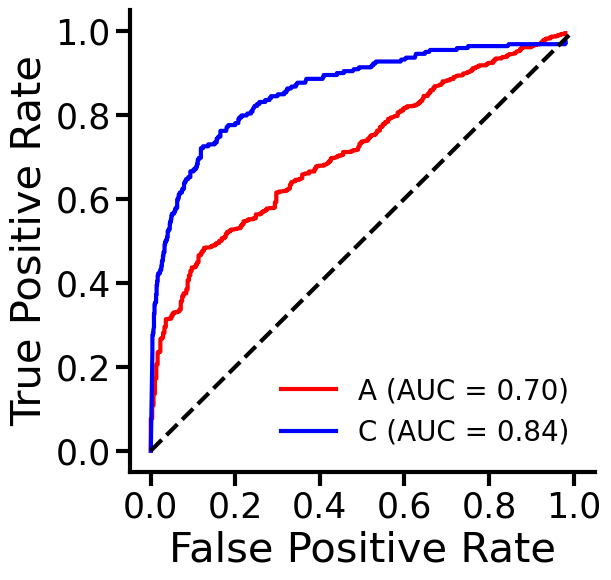

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Columns in DataFrame
reactivity_col = "norm_reactivity_nt"  # Replace with actual column name
paired_col = "pairing"  # 1 for paired, 0 for unpaired
residue_col = "Sequence"  # Column specifying residue identity (A, C, G, U)

# Define color mapping for bases
#base_colors = {"A": "blue", "C": "green", "G": "red", "U": "purple"}
base_colors = {"A": "red", "C": "blue"}

# Plot ROC curves for each base
#plt.figure(figsize=(6,6), dpi= 1000)
plt.figure(figsize=(6,6))
for base, color in base_colors.items():
    # Filter dataframe for the specific residue type
    df_base = dms_ecoli_AC[dms_ecoli_AC[residue_col] == base]

    # Define true labels (1 = unpaired/reactive expected, 0 = paired/unreactive expected)
    y_true = 1 - df_base[paired_col]  

    # Iterate over different reactivity cut-offs
    #cut-offs by user defined number of steps
    #cutoffs = np.linspace(df_base[reactivity_col].min(), df_base[reactivity_col].max(), 2000)
    
    #cut-offs by the unique reactivities 
    cutoffs= np.sort(df_base[reactivity_col].unique())
    
    sensitivity_list = []
    specificity_list = []

    for cutoff in cutoffs:
        # Predict reactivity based on cutoff
        y_pred = (df_base[reactivity_col] >= cutoff).astype(int)

        # Compute TP, TN, FP, FN
        TP = np.sum((y_pred == 1) & (y_true == 1))
        TN = np.sum((y_pred == 0) & (y_true == 0))
        FP = np.sum((y_pred == 1) & (y_true == 0))
        FN = np.sum((y_pred == 0) & (y_true == 1))

        # Compute Sensitivity (Recall) and Specificity
        sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
        specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

        sensitivity_list.append(sensitivity)
        specificity_list.append(specificity)

    # Convert lists to numpy arrays for sorting
    specificity_list = np.array(specificity_list)
    sensitivity_list = np.array(sensitivity_list)
    sort_order = np.argsort(-specificity_list)  # Sort specificity in descending order

    # Compute AUC
    roc_auc = auc(1 - specificity_list, sensitivity_list)

    # Plot ROC Curve
    #plt.plot(1 - specificity_list[sort_order], sensitivity_list[sort_order], label=f"{base} (AUC = {roc_auc:.2f})", color=color)
    plt.plot(1 - specificity_list, sensitivity_list, label=f"{base} (AUC = {roc_auc:.2f})", color=color, linewidth=3)

# Plot diagonal (random classifier)
#plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.plot([0, 1], [0, 1], 'k--', linewidth=3)

# Label the axes
plt.xlabel("False Positive Rate", fontsize=30)
plt.ylabel("True Positive Rate", fontsize= 30)
#plt.title("ROC curve for E. coli DMS reactivity (all res)")
plt.tick_params(axis='both', width=3, length=10)

ticks_loc=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
plt.yticks(ticks_loc, fontsize = 25)
plt.xticks(ticks_loc, fontsize = 25)

ax= plt.gca()
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
ax.spines.left.set_linewidth(3)
ax.spines.bottom.set_linewidth(3)

plt.legend(loc='lower right', fontsize=20, frameon=False)
plt.grid(False)
#plt.show()
plt.savefig('fig_S4_A_Ecoli_rRNA_DMS_reactivity.pdf', format="pdf", bbox_inches="tight", dpi = 3000)

# yeast_all

In [11]:
res_int= ['A', 'C']
dms_yeast_AC= dms_yeast[dms_yeast['Sequence'].isin(res_int)]
dms_yeast_AC.index= np.arange(0, len(dms_yeast_AC))

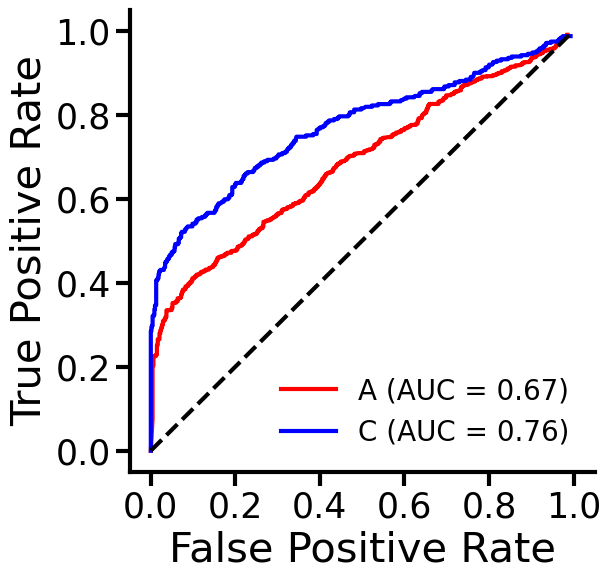

In [12]:
# Columns in DataFrame
reactivity_col = "norm_reactivity_nt"  # Replace with actual column name
paired_col = "pairing"  # 1 for paired, 0 for unpaired
residue_col = "Sequence"  # Column specifying residue identity (A, C, G, U)

# Define color mapping for bases
#base_colors = {"A": "blue", "C": "green", "G": "red", "U": "purple"}
base_colors = {"A": "red", "C": "blue"}

# Plot ROC curves for each base
#plt.figure(figsize=(6,6), dpi= 1000)
plt.figure(figsize=(6,6))
for base, color in base_colors.items():
    # Filter dataframe for the specific residue type
    df_base = dms_yeast_AC[dms_yeast_AC[residue_col] == base]

    # Define true labels (1 = unpaired/reactive expected, 0 = paired/unreactive expected)
    y_true = 1 - df_base[paired_col]  

    # Iterate over different reactivity cut-offs
    #cut-offs by user defined number of steps
    #cutoffs = np.linspace(df_base[reactivity_col].min(), df_base[reactivity_col].max(), 2000)
    
    #cut-offs by the unique reactivities 
    cutoffs= np.sort(df_base[reactivity_col].unique())
    
    sensitivity_list = []
    specificity_list = []

    for cutoff in cutoffs:
        # Predict reactivity based on cutoff
        y_pred = (df_base[reactivity_col] >= cutoff).astype(int)

        # Compute TP, TN, FP, FN
        TP = np.sum((y_pred == 1) & (y_true == 1))
        TN = np.sum((y_pred == 0) & (y_true == 0))
        FP = np.sum((y_pred == 1) & (y_true == 0))
        FN = np.sum((y_pred == 0) & (y_true == 1))

        # Compute Sensitivity (Recall) and Specificity
        sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
        specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

        sensitivity_list.append(sensitivity)
        specificity_list.append(specificity)

    # Convert lists to numpy arrays for sorting
    specificity_list = np.array(specificity_list)
    sensitivity_list = np.array(sensitivity_list)
    sort_order = np.argsort(-specificity_list)  # Sort specificity in descending order

    # Compute AUC
    roc_auc = auc(1 - specificity_list, sensitivity_list)

    # Plot ROC Curve
    #plt.plot(1 - specificity_list[sort_order], sensitivity_list[sort_order], label=f"{base} (AUC = {roc_auc:.2f})", color=color)
    plt.plot(1 - specificity_list, sensitivity_list, label=f"{base} (AUC = {roc_auc:.2f})", color=color, linewidth=3)

# Plot diagonal (random classifier)
#plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.plot([0, 1], [0, 1], 'k--', linewidth=3)

# Label the axes
plt.xlabel("False Positive Rate", fontsize=30)
plt.ylabel("True Positive Rate", fontsize= 30)
#plt.title("ROC curve for yeast DMS reactivity (all res)")
plt.tick_params(axis='both', width=3, length=10)

ticks_loc=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
plt.yticks(ticks_loc, fontsize = 25)
plt.xticks(ticks_loc, fontsize = 25)

ax= plt.gca()
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
ax.spines.left.set_linewidth(3)
ax.spines.bottom.set_linewidth(3)

plt.legend(loc='lower right', fontsize=20, frameon=False)
plt.grid(False)
#plt.show()
plt.savefig('fig_S4_B_yeast_rRNA_DMS_reactivity.pdf', format="pdf", bbox_inches="tight", dpi = 3000)

# human_all

In [13]:
res_int= ['A', 'C']
dms_human_AC= dms_hsapien[dms_hsapien['Sequence'].isin(res_int)]
dms_human_AC.index= np.arange(0, len(dms_human_AC))

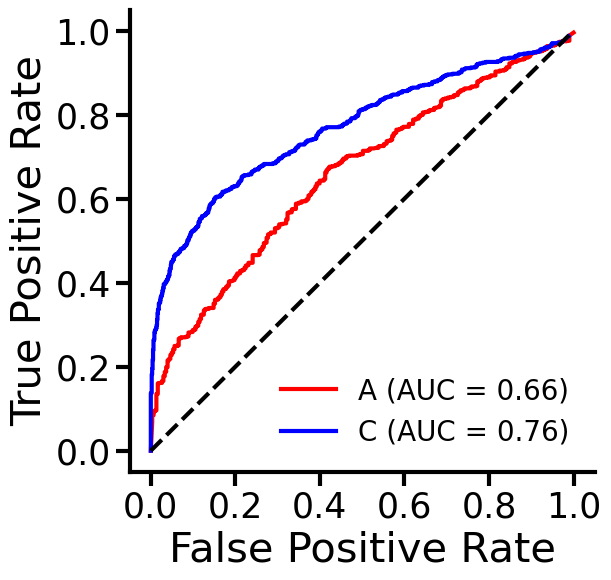

In [14]:
# Columns in DataFrame
reactivity_col = "norm_reactivity_nt"  # Replace with actual column name
paired_col = "pairing"  # 1 for paired, 0 for unpaired
residue_col = "Sequence"  # Column specifying residue identity (A, C, G, U)

# Define color mapping for bases
#base_colors = {"A": "blue", "C": "green", "G": "red", "U": "purple"}
base_colors = {"A": "red", "C": "blue"}

# Plot ROC curves for each base
#plt.figure(figsize=(6,6), dpi= 1000)
plt.figure(figsize=(6,6))
for base, color in base_colors.items():
    # Filter dataframe for the specific residue type
    df_base = dms_human_AC[dms_human_AC[residue_col] == base]

    # Define true labels (1 = unpaired/reactive expected, 0 = paired/unreactive expected)
    y_true = 1 - df_base[paired_col]  

    # Iterate over different reactivity cut-offs
    #cut-offs by user defined number of steps
    #cutoffs = np.linspace(df_base[reactivity_col].min(), df_base[reactivity_col].max(), 2000)
    
    #cut-offs by the unique reactivities 
    cutoffs= np.sort(df_base[reactivity_col].unique())
    
    sensitivity_list = []
    specificity_list = []

    for cutoff in cutoffs:
        # Predict reactivity based on cutoff
        y_pred = (df_base[reactivity_col] >= cutoff).astype(int)

        # Compute TP, TN, FP, FN
        TP = np.sum((y_pred == 1) & (y_true == 1))
        TN = np.sum((y_pred == 0) & (y_true == 0))
        FP = np.sum((y_pred == 1) & (y_true == 0))
        FN = np.sum((y_pred == 0) & (y_true == 1))

        # Compute Sensitivity (Recall) and Specificity
        sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
        specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

        sensitivity_list.append(sensitivity)
        specificity_list.append(specificity)

    # Convert lists to numpy arrays for sorting
    specificity_list = np.array(specificity_list)
    sensitivity_list = np.array(sensitivity_list)
    sort_order = np.argsort(-specificity_list)  # Sort specificity in descending order

    # Compute AUC
    roc_auc = auc(1 - specificity_list, sensitivity_list)

    # Plot ROC Curve
    #plt.plot(1 - specificity_list[sort_order], sensitivity_list[sort_order], label=f"{base} (AUC = {roc_auc:.2f})", color=color)
    plt.plot(1 - specificity_list, sensitivity_list, label=f"{base} (AUC = {roc_auc:.2f})", color=color, linewidth=3)

# Plot diagonal (random classifier)
#plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.plot([0, 1], [0, 1], 'k--', linewidth=3)

# Label the axes
plt.xlabel("False Positive Rate", fontsize=30)
plt.ylabel("True Positive Rate", fontsize= 30)
#plt.title("ROC curve for human DMS reactivity (all res)")
plt.tick_params(axis='both', width=3, length=10)

ticks_loc=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
plt.yticks(ticks_loc, fontsize = 25)
plt.xticks(ticks_loc, fontsize = 25)

ax= plt.gca()
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
ax.spines.left.set_linewidth(3)
ax.spines.bottom.set_linewidth(3)

plt.legend(loc='lower right', fontsize=20, frameon=False)
plt.grid(False)
#plt.show()
plt.savefig('fig_S4_C_human_rRNA_DMS_reactivity.pdf', format="pdf", bbox_inches="tight", dpi = 3000)

# ecoli_PTC

In [15]:
ptc_res = [num for r in [range(2048, 2082), range(2239, 2259), range(2422, 2620)] for num in r]
print(ptc_res)
print (len(ptc_res))

[2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2239, 2240, 2241, 2242, 2243, 2244, 2245, 2246, 2247, 2248, 2249, 2250, 2251, 2252, 2253, 2254, 2255, 2256, 2257, 2258, 2422, 2423, 2424, 2425, 2426, 2427, 2428, 2429, 2430, 2431, 2432, 2433, 2434, 2435, 2436, 2437, 2438, 2439, 2440, 2441, 2442, 2443, 2444, 2445, 2446, 2447, 2448, 2449, 2450, 2451, 2452, 2453, 2454, 2455, 2456, 2457, 2458, 2459, 2460, 2461, 2462, 2463, 2464, 2465, 2466, 2467, 2468, 2469, 2470, 2471, 2472, 2473, 2474, 2475, 2476, 2477, 2478, 2479, 2480, 2481, 2482, 2483, 2484, 2485, 2486, 2487, 2488, 2489, 2490, 2491, 2492, 2493, 2494, 2495, 2496, 2497, 2498, 2499, 2500, 2501, 2502, 2503, 2504, 2505, 2506, 2507, 2508, 2509, 2510, 2511, 2512, 2513, 2514, 2515, 2516, 2517, 2518, 2519, 2520, 2521, 2522, 2523, 2524, 2525, 2526, 2527, 2528, 2529, 2530, 2531, 2532, 2533, 253

In [16]:
#E. coli 23S rRNA
dms_ecoli_rt= dms_ecoli[dms_ecoli['RNA']=='23S']
dms_ecoli_rt.index= np.arange(0, len(dms_ecoli_rt))

dms_ecoli_ri= dms_ecoli_rt[dms_ecoli_rt['Nucleotide'].isin(ptc_res)]
dms_ecoli_ri.index= np.arange(0, len(dms_ecoli_ri))

print (dms_ecoli_rt.shape)
print (dms_ecoli_ri.shape)

(2904, 33)
(252, 33)


In [17]:
PTC_ecoli_AC= dms_ecoli_ri[dms_ecoli_ri['Sequence'].isin(['A', 'C'])]
PTC_ecoli_AC.index= np.arange(0, len(PTC_ecoli_AC))

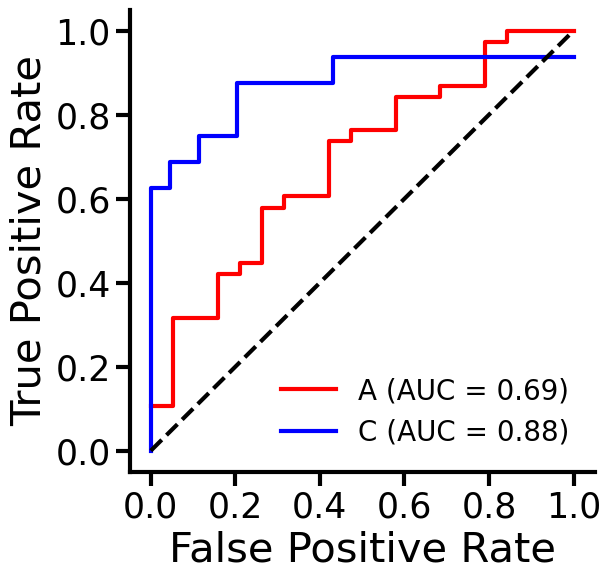

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Columns in DataFrame
reactivity_col = "norm_reactivity_nt"  # Replace with actual column name
paired_col = "pairing"  # 1 for paired, 0 for unpaired
residue_col = "Sequence"  # Column specifying residue identity (A, C, G, U)

# Define color mapping for bases
#base_colors = {"A": "blue", "C": "green", "G": "red", "U": "purple"}
base_colors = {"A": "red", "C": "blue"}

# Plot ROC curves for each base
#plt.figure(figsize=(6,6), dpi= 1000)
plt.figure(figsize=(6,6))

for base, color in base_colors.items():
    # Filter dataframe for the specific residue type
    df_base = PTC_ecoli_AC[PTC_ecoli_AC[residue_col] == base]

    # Define true labels (1 = unpaired/reactive expected, 0 = paired/unreactive expected)
    y_true = 1 - df_base[paired_col]  

    # Iterate over different reactivity cut-offs
    #cut-offs by user defined number of steps
    #cutoffs = np.linspace(df_base[reactivity_col].min(), df_base[reactivity_col].max(), 2000)
    
    #cut-offs by the unique reactivities 
    cutoffs= np.sort(df_base[reactivity_col].unique())
    
    sensitivity_list = []
    specificity_list = []

    for cutoff in cutoffs:
        # Predict reactivity based on cutoff
        y_pred = (df_base[reactivity_col] >= cutoff).astype(int)

        # Compute TP, TN, FP, FN
        TP = np.sum((y_pred == 1) & (y_true == 1))
        TN = np.sum((y_pred == 0) & (y_true == 0))
        FP = np.sum((y_pred == 1) & (y_true == 0))
        FN = np.sum((y_pred == 0) & (y_true == 1))

        # Compute Sensitivity (Recall) and Specificity
        sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
        specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

        sensitivity_list.append(sensitivity)
        specificity_list.append(specificity)

    # Convert lists to numpy arrays for sorting
    specificity_list = np.array(specificity_list)
    sensitivity_list = np.array(sensitivity_list)
    sort_order = np.argsort(-specificity_list)  # Sort specificity in descending order

    # Compute AUC
    roc_auc = auc(1 - specificity_list, sensitivity_list)

    # Plot ROC Curve
    #plt.plot(1 - specificity_list[sort_order], sensitivity_list[sort_order], label=f"{base} (AUC = {roc_auc:.2f})", color=color)
    plt.plot(1 - specificity_list, sensitivity_list, label=f"{base} (AUC = {roc_auc:.2f})", color=color, linewidth=3)

# Plot diagonal (random classifier)
#plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.plot([0, 1], [0, 1], 'k--', linewidth=3)

# Label the axes
plt.xlabel("False Positive Rate", fontsize=30)
plt.ylabel("True Positive Rate", fontsize= 30)
#plt.title("ROC curve for E. coli DMS reactivity (PTC res)")
plt.tick_params(axis='both', width=3, length=10)

ticks_loc=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
plt.yticks(ticks_loc, fontsize = 25)
plt.xticks(ticks_loc, fontsize = 25)

ax= plt.gca()
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
ax.spines.left.set_linewidth(3)
ax.spines.bottom.set_linewidth(3)

plt.legend(loc='lower right', fontsize=20, frameon=False)
plt.grid(False)
#plt.show()
plt.savefig('fig_S4_D_Ecoli_PTC_DMS_reactivity.pdf', format="pdf", bbox_inches="tight", dpi = 3000)


# yeast_PTC

In [19]:
ptc_res = [num for r in [range(2390, 2424), range(2607, 2629), range(2794, 2990)] for num in r]

In [20]:
dms_yeast_rt= dms_yeast[dms_yeast['RNA']=='25S']
dms_yeast_rt.index= np.arange(0, len(dms_yeast_rt))

dms_yeast_ri= dms_yeast_rt[dms_yeast_rt['Nucleotide'].isin(ptc_res)]
dms_yeast_ri.index= np.arange(0, len(dms_yeast_ri))

print (dms_yeast_rt.shape)
print (dms_yeast_ri.shape)

(3396, 32)
(252, 32)


In [21]:
PTC_yeast_AC= dms_yeast_ri[dms_yeast_ri['Sequence'].isin(res_int)]
PTC_yeast_AC.index= np.arange(0, len(PTC_yeast_AC))

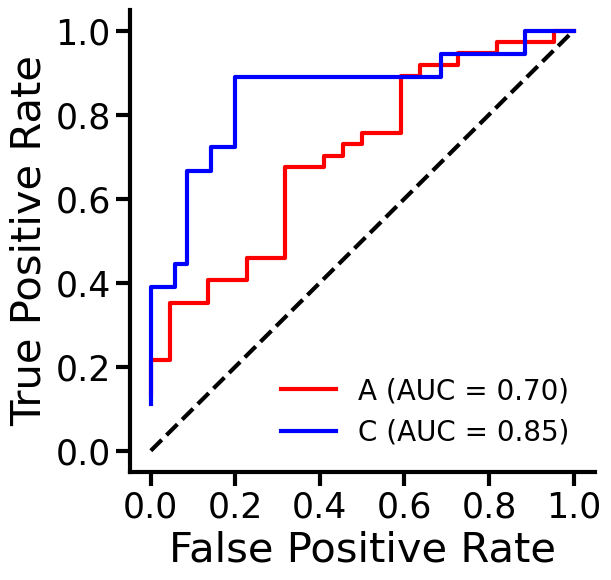

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Columns in DataFrame
reactivity_col = "norm_reactivity_nt"  # Replace with actual column name
paired_col = "pairing"  # 1 for paired, 0 for unpaired
residue_col = "Sequence"  # Column specifying residue identity (A, C, G, U)

# Define color mapping for bases
#base_colors = {"A": "blue", "C": "green", "G": "red", "U": "purple"}
base_colors = {"A": "red", "C": "blue"}

# Plot ROC curves for each base
#plt.figure(figsize=(6,6), dpi= 1000)
plt.figure(figsize=(6,6))

for base, color in base_colors.items():
    # Filter dataframe for the specific residue type
    df_base = PTC_yeast_AC[PTC_yeast_AC[residue_col] == base]

    # Define true labels (1 = unpaired/reactive expected, 0 = paired/unreactive expected)
    y_true = 1 - df_base[paired_col]  

    # Iterate over different reactivity cut-offs
    #cut-offs by user defined number of steps
    #cutoffs = np.linspace(df_base[reactivity_col].min(), df_base[reactivity_col].max(), 2000)
    
    #cut-offs by the unique reactivities 
    cutoffs= np.sort(df_base[reactivity_col].unique())
    
    sensitivity_list = []
    specificity_list = []

    for cutoff in cutoffs:
        # Predict reactivity based on cutoff
        y_pred = (df_base[reactivity_col] >= cutoff).astype(int)

        # Compute TP, TN, FP, FN
        TP = np.sum((y_pred == 1) & (y_true == 1))
        TN = np.sum((y_pred == 0) & (y_true == 0))
        FP = np.sum((y_pred == 1) & (y_true == 0))
        FN = np.sum((y_pred == 0) & (y_true == 1))

        # Compute Sensitivity (Recall) and Specificity
        sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
        specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

        sensitivity_list.append(sensitivity)
        specificity_list.append(specificity)

    # Convert lists to numpy arrays for sorting
    specificity_list = np.array(specificity_list)
    sensitivity_list = np.array(sensitivity_list)
    sort_order = np.argsort(-specificity_list)  # Sort specificity in descending order

    # Compute AUC
    roc_auc = auc(1 - specificity_list, sensitivity_list)

    # Plot ROC Curve
    #plt.plot(1 - specificity_list[sort_order], sensitivity_list[sort_order], label=f"{base} (AUC = {roc_auc:.2f})", color=color)
    plt.plot(1 - specificity_list, sensitivity_list, label=f"{base} (AUC = {roc_auc:.2f})", color=color, linewidth=3)

# Plot diagonal (random classifier)
#plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.plot([0, 1], [0, 1], 'k--', linewidth=3)

# Label the axes
plt.xlabel("False Positive Rate", fontsize=30)
plt.ylabel("True Positive Rate", fontsize= 30)
#plt.title("ROC curve for yeast DMS reactivity (PTC res)")
plt.tick_params(axis='both', width=3, length=10)

ticks_loc=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
plt.yticks(ticks_loc, fontsize = 25)
plt.xticks(ticks_loc, fontsize = 25)

ax= plt.gca()
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
ax.spines.left.set_linewidth(3)
ax.spines.bottom.set_linewidth(3)

plt.legend(loc='lower right', fontsize=20, frameon=False)
plt.grid(False)
#plt.show()
plt.savefig('fig_S4_E_yeast_PTC_DMS_reactivity.pdf', format="pdf", bbox_inches="tight", dpi = 3000)

# human_all

In [23]:
ptc_res = [num for r in [range(3894, 3928), range(4183, 4205), range(4370, 4567)] for num in r]

In [24]:
dms_hsapien_rt= dms_hsapien[dms_hsapien['RNA']=='28S']
dms_hsapien_rt.index= np.arange(0, len(dms_hsapien_rt))

dms_hsapien_rt['Nucleotide']= dms_hsapien_rt['Nucleotide']+1
dms_hsapien_ri= dms_hsapien_rt[dms_hsapien_rt['Nucleotide'].isin(ptc_res)]
dms_hsapien_ri.index= np.arange(0, len(dms_hsapien_ri))

print (dms_hsapien_rt.shape)
print (dms_hsapien_ri.shape)

(5069, 32)
(253, 32)


/var/folders/wh/29t7h4rn1jg5ss_v64_j72jc0000gn/T/ipykernel_47748/841609331.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dms_hsapien_rt['Nucleotide']= dms_hsapien_rt['Nucleotide']+1


In [25]:
PTC_hsapien_AC= dms_hsapien_ri[dms_hsapien_ri['Sequence'].isin(res_int)]
PTC_hsapien_AC.index= np.arange(0, len(PTC_hsapien_AC))

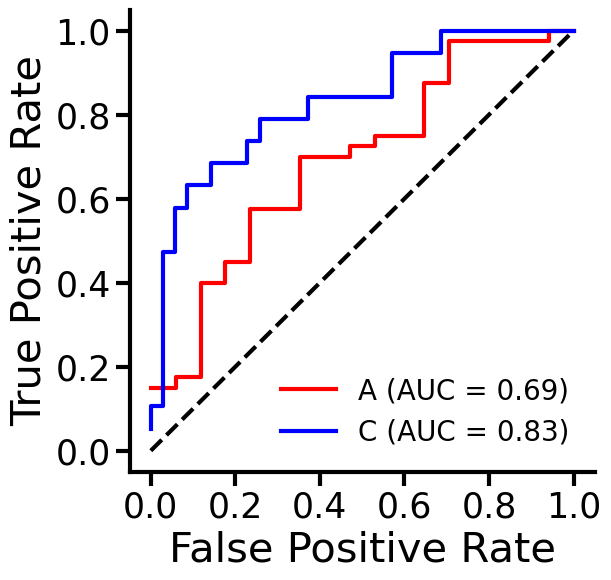

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Columns in DataFrame
reactivity_col = "norm_reactivity_nt"  # Replace with actual column name
paired_col = "pairing"  # 1 for paired, 0 for unpaired
residue_col = "Sequence"  # Column specifying residue identity (A, C, G, U)

# Define color mapping for bases
#base_colors = {"A": "blue", "C": "green", "G": "red", "U": "purple"}
base_colors = {"A": "red", "C": "blue"}

# Plot ROC curves for each base
#plt.figure(figsize=(6,6), dpi= 1000)
plt.figure(figsize=(6,6))

for base, color in base_colors.items():
    # Filter dataframe for the specific residue type
    df_base = PTC_hsapien_AC[PTC_hsapien_AC[residue_col] == base]

    # Define true labels (1 = unpaired/reactive expected, 0 = paired/unreactive expected)
    y_true = 1 - df_base[paired_col]  

    # Iterate over different reactivity cut-offs
    #cut-offs by user defined number of steps
    #cutoffs = np.linspace(df_base[reactivity_col].min(), df_base[reactivity_col].max(), 2000)
    
    #cut-offs by the unique reactivities 
    cutoffs= np.sort(df_base[reactivity_col].unique())
    
    sensitivity_list = []
    specificity_list = []

    for cutoff in cutoffs:
        # Predict reactivity based on cutoff
        y_pred = (df_base[reactivity_col] >= cutoff).astype(int)

        # Compute TP, TN, FP, FN
        TP = np.sum((y_pred == 1) & (y_true == 1))
        TN = np.sum((y_pred == 0) & (y_true == 0))
        FP = np.sum((y_pred == 1) & (y_true == 0))
        FN = np.sum((y_pred == 0) & (y_true == 1))

        # Compute Sensitivity (Recall) and Specificity
        sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
        specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

        sensitivity_list.append(sensitivity)
        specificity_list.append(specificity)

    # Convert lists to numpy arrays for sorting
    specificity_list = np.array(specificity_list)
    sensitivity_list = np.array(sensitivity_list)
    sort_order = np.argsort(-specificity_list)  # Sort specificity in descending order

    # Compute AUC
    roc_auc = auc(1 - specificity_list, sensitivity_list)

    # Plot ROC Curve
    #plt.plot(1 - specificity_list[sort_order], sensitivity_list[sort_order], label=f"{base} (AUC = {roc_auc:.2f})", color=color)
    plt.plot(1 - specificity_list, sensitivity_list, label=f"{base} (AUC = {roc_auc:.2f})", color=color, linewidth=3)

# Plot diagonal (random classifier)
#plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.plot([0, 1], [0, 1], 'k--', linewidth=3)

# Label the axes
plt.xlabel("False Positive Rate", fontsize=30)
plt.ylabel("True Positive Rate", fontsize= 30)
#plt.title("ROC curve for human DMS reactivity (PTC res)")
plt.tick_params(axis='both', width=3, length=10)

ticks_loc=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
plt.yticks(ticks_loc, fontsize = 25)
plt.xticks(ticks_loc, fontsize = 25)

ax= plt.gca()
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
ax.spines.left.set_linewidth(3)
ax.spines.bottom.set_linewidth(3)

plt.legend(loc='lower right', fontsize=20, frameon=False)
plt.grid(False)
#plt.show()
plt.savefig('fig_S4_F_human_PTC_DMS_reactivity.pdf', format="pdf", bbox_inches="tight", dpi = 3000)